---
## Sorbonne Université
# <center> Mathématiques discrètes </center>
## <center> LU2IN005 </center>
## <div style="text-align:right;"> Année 2025-2026</div>
---

---
# <center> TME programmation d'automates finis </center>

L'objectif de ce TME est de programmer en python quelques uns des
algorithmes pour les automates finis vus en cours et en TD, en
utilisant des structures de données fournies dans le code mis à votre
disposition.
---
# Consignes

Copiez dans votre répertoire de travail les fichiers présents dans le Dossier 
*Fichiers Python fournis* de la page Moodle de l'UE.

Ils contiennent les définitions de structures de données décrites
ci-dessous, ainsi que des aide-mémoire sur l'utilisation de python.

**Le seul fichier que vous êtes autorisés à modifier** est 
`Projet_etudiant.ipynb`, partiellement prérempli. 
Les instructions `return` sont à supprimer lorsque
vous remplirez le contenu des différentes fonctions.  Les autres
fichiers n'ont pas besoin d'être lus (mais ils peuvent l'être).

---

### Table des matières

> [1. Présentation](#sec1)
>> [1.1 La classe `State`](#sec1_1) <br>
>> [1.2 La classe `Transition`](#sec1_2) <br>
>> [1.3 La classe `Automate`](#sec1_3)

> [2. Prise en mains](#sec2)
>> [2.1 Création d'automates](#sec2_1) <br>
>> [2.2 Premières manipulations](#sec2_2) <br>

> [3. Exercices de base : tests et complétion](#sec3)

> [4. Déterminisation](#sec4)

> [5. Constructions sur les automates réalisant des opérations sur les langages acceptés](#sec5)
>> [5.1 Opérations ensemblistes sur les langages](#sec5_1) <br>
>> [5.2 Opérations rationnelles sur les langages](#sec5_2)

> [6. Application](#sec6)

In [1]:
## Import des bibliothèques nécessaires au projet.
## Ne pas modifier les fichiers "bibliothèque".

## Interpréter cette cellule avant de continuer.

from transition import *
from state import *
import os
import copy
from automateBase import AutomateBase
import itertools

class Automate(AutomateBase):
    pass

### 1. Présentation  <a class="anchor" id="sec1"></a>

Le projet utilise le langage python avec une syntaxe légèrement
différente de celle vue en **LU1IN001 / 011**, parce qu'il exploite en particulier
la notion de classes d'objets. Une introduction à cette notion est présentée dans le livre associé
au cours : cf [Chapitre 13](https://www-licence.ufr-info-p6.jussieu.fr/lmd/licence/2021/ue/LU1IN001-2021oct/cours2020.pdf).

De plus, le typage des variables est noté de façon légèrement différente, en commentaires, pour les déclarations
comme pour les arguments des fonctions. Pour ces derniers, les types sont indiqués dans la première ligne de la documentation de la fonction.

Les particularités sont brièvement expliquées en annexe
de ce document. Par ailleurs, vous trouverez dans la section
`projet` de la page Moodle un mémo sur la syntaxe python, ainsi que la carte de
référence du langage utilisée en **LU1IN001 / 011**.  On rappelle qu'une ligne
commençant par `#` est un commentaire, ignoré par
l'interpréteur.

Toutes les structures de données nécessaires à la construction des
automates sont fournies sous la forme de classes python, pour les
transitions d'un automate, ses états, et les automates
eux-mêmes. Cette section indique comment les utiliser.

#### 1.1 La classe `State` <a class="anchor" id="sec1_1"></a>

Un état est représenté par
- un entier `id` (type `int`) qui définit son identifiant,
- un booléen `init` (type `bool`) indiquant si c'est un état initial,
- un booléen `fin` (type `bool`) indiquant si c'est un état final,
- une chaîne de caractères `label` (type `str`) qui définit son étiquette, permettant de le *décorer*. Par défaut, cette variable est la version chaîne de caractères de l'identifiant de l'état. 

On définit l'alias de type `State` pour représenter les variables de ce type. 

Ainsi, l'instruction ci-dessous crée une variable `s` représentant un état d'identifiant `1`, qui est un état initial mais pas final, dont l'identifiant et l'étiquette  `1` :

In [2]:
# s : State
s = State(1, True, False)

In [3]:
# s : State
s = State(1, True, False)

Si l'on souhaite avoir une étiquette différente de l'identifiant, on
utilise un quatrième argument :

In [4]:
s = State(1, True, False, 'etat 1') 

On accède ensuite aux différents champs de `s` par la notation pointée : exécutez les cellules suivantes pour observer l'affichage obtenu.

In [5]:
print('La valeur de s.id est : ')
print(s.id)

La valeur de s.id est : 
1


In [6]:
print('La valeur de s.init est : ')
print(s.init)

La valeur de s.init est : 
True


In [7]:
print('La valeur de s.fin est : ')
print(s.fin)

La valeur de s.fin est : 
False


In [8]:
print('La valeur de s.label est : ')
print(s.label)

La valeur de s.label est : 
etat 1


In [9]:
print("L'affichage de s est : ")
print(s)

L'affichage de s est : 
etat 1(init)


Ainsi, une variable de type `State` est affichée par son étiquette et, entre parenthèses, si c'est un état initial et/ou final.

#### 1.2 La classe `Transition` <a class="anchor" id="sec1_2"></a>

Une transition est représentée par 
- un état `stateSrc` (type `State`) correspondant à son état de départ
- un caractère `etiquette` (type `str`) donnant son   étiquette
- un état `stateDest` (type `State`) correspondant à son état de destination

On définit l'alias de type `Transition` pour représenter les variables de ce type.

La séquence d'instructions suivante crée la transition d'étiquette `"a"` de l'état `s` (défini ci-dessus) vers lui-même et affiche les différents champs de la transition :

In [10]:
# t : Transition
t = Transition(s, "a", s)

In [11]:
print('La valeur de t.etiquette est : ')
print(t.etiquette)

La valeur de t.etiquette est : 
a


In [12]:
print("L'affichage de t.stateSrc est : ")
print(t.stateSrc)

L'affichage de t.stateSrc est : 
etat 1(init)


On remarque que la variable `stateSrc` est de type `State`, on obtient donc un état, et non uniquement un
identifiant d'état. 

In [13]:
print("L'affichage de t.stateDest est : ")
print(t.stateDest)

L'affichage de t.stateDest est : 
etat 1(init)


In [14]:
print("L'affichage de t est : ")
print(t)

L'affichage de t est : 
[etat 1(init)-a->etat 1(init)]


#### 1.3 La classe `Automate` <a class="anchor" id="sec1_3"></a>

Un automate est représenté par
- l'ensemble de ses transitions `allTransitions` (de type `set[Transition]`) 
- l'ensemble de ses états `allStates` (de type `set[State]`)
- une étiquette `label` (de type `str`) qui est éventuellement vide.

On définit l'alias de type `Automate` pour représenter les variables de ce type.

Ainsi, de même que pour les classes précédentes, l'accès aux
différents champs se fait par la notation pointée. Par exemple, on
obtient l'ensemble des états d'un automate `monAutomate` par
l'instruction `monAutomate.allStates`.

Pour créer un automate, il existe trois possibilités.

**Création à partir d'un ensemble de transitions.**<br>
On peut d'abord utiliser le constructeur de signature `Automate : set[Transition] -> Automate`.<br>
Il déduit alors l'ensemble des états à partir de l'ensemble des transitions et définit par défaut l'étiquette
de l'automate comme la chaîne de caractères vide.

Par exemple, en commençant par créer les états et les transitions nécessaires :

In [15]:
## création d'états
# s1 : State
s1 = State(1, True, False)
# s2 : State
s2 = State(2, False, True)

## création de transitions
# t1 : Transition
t1 = Transition(s1,"a",s1)
# t2 : Transition
t2 = Transition(s1,"a",s2)
# t3 : Transition
t3 = Transition(s1,"b",s2)
# t4 : Transition
t4 = Transition(s2,"a",s2)
# t5 : Transition
t5 = Transition(s2,"b",s2)
# set_transitions : set[Transition]
set_transitions = {t1, t2, t3, t4, t5}

## création de l'automate
# aut : Automate
aut = Automate(set_transitions)

L'affichage de cet automate, par la commande `print(aut)` produit alors le résultat suivant : 

In [16]:
print(aut)

Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [1(init)-a->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]



Les états de l'automate sont déduits de l'ensemble de transitions.

Optionnellement, on peut donner un nom à l'automate, en utilisant la variable `label`, par exemple :

In [17]:
# aut2 : Automate
aut2 = Automate(set_transitions, label="A") 

print(aut2)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [1(init)-a->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]



**Création à partir d'un ensemble de transitions et d'un ensemble d'états.**<br>
Dans le second cas, on crée un automate à partir d'un ensemble de
transitions mais aussi d'un ensemble d'états, par exemple pour représenter des
automates contenant des états isolés. Pour cela, on utilise le
constructeur `Automate : set[Transition] x set[State] -> Automate`.

On peut également, optionnellement, donner un nom à l'automate :

In [18]:
# set_etats : set[State]
set_etats = {s1, s2}

# aut3 : Automate
aut3 = Automate(set_transitions, set_etats, "B")

print(aut3)

Automate B
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [1(init)-a->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]



L'ordre des paramètres peut ne pas être respecté **à la condition** que l'on donne leur nom explicitement. Ainsi, la ligne suivante est correcte :

In [19]:
aut = Automate(setStates = set_etats, label = "A", setTransitions = set_transitions)

print(aut)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [1(init)-a->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]



**Création à partir d'un fichier contenant sa description.**<br>
La fonction `Automate.creationAutomate : str -> Automate` prend en argument un nom de fichier qui décrit un automate et construit l'automate correspondant (voir exemple ci-dessous).

La description textuelle de l'automate doit suivre le format suivant (voir exemple ci-dessous) :
- #E: suivi de la liste des noms des états, séparés par
  des espaces ou des passages à la ligne. Les noms d'états peuvent
  être n'importe quelle chaîne alphanumérique pouvant également
  contenir le symbole `_`. Par contre, si le nom d'état
  contient des symboles *non numériques* il ne doit pas commencer
  par un chiffre, sous peine de provoquer une erreur à l'affichage.
  Ainsi, `10` et `A1` sont des noms d'états possibles,
  mais `1A` ne l'est pas.
- #I: suivi de la liste des états initiaux
  séparés par des espaces ou des passages à la ligne, 
- #F: suivi de la liste des
  états finaux séparés par des espaces ou des passages à la ligne, 
- #T: suivi de la liste des transitions séparées par des
  espaces ou des passages à la ligne. Chaque transition est donnée
  sous le format `(etat1, lettre, etat2)`.

Par exemple le fichier `exempleAutomate.txt` contenant <br>
`#E: 0 1 2 3`<br>
`#I: 0`<br>
`#F: 3`<br>
`#T: (0 a 0)`<br>
`	(0 b 0)`<br>
`	(0 a 1)`<br>
`	(1 a 2)`<br>
`	(2 a 3)`<br>
`	(3 a 3)`<br>
`	(3 b 3)`<br>
est formaté correctement. L'appel suivant produira l'affichage...

In [20]:
# automate : Automate
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
print(automate)

Etats :
  0(init)
  1
  2
  3(fin)
Transitions :
  [0(init)-a->0(init)]
  [1-a->2]
  [3(fin)-a->3(fin)]
  [2-a->3(fin)]
  [0(init)-b->0(init)]
  [0(init)-a->1]
  [3(fin)-b->3(fin)]



**Fonctions de manipulation des automates.**<br>
La classe automate contient également de nombreuses fonctions utiles. Elles
s'appliquent à un objet de type `Automate` et s'utilisent donc sous la forme
`aut.<`*fonction*`>(<`*parametres*`>)` où `aut` est une variable de type `Automate`.


- `show : float -> NoneType` <br> 
    prend en argument facultatif un flottant (facteur de grossissement, par défaut il vaut 1.0) et produit une représentation graphique de l'automate.<br>
    Ainsi, en utilisant l'automate défini dans le fichier d'exemple précédent, l'instruction `automate.show(1.2)` produit l'image suivante :

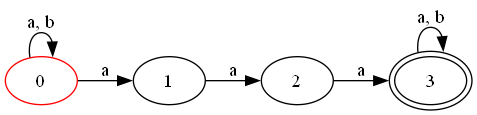

In [21]:
automate.show(1.2)

- `addTransition : Transition -> bool`<br>
  prend en argument une transition `t`, fait la mise à jour de
  l'automate en lui ajoutant `t` et ajoute les états impliqués
  dans l'automate s'ils en sont absents. Elle rend `True` si l'ajout a
  eu lieu, `False` sinon (si `t` était déjà présente dans l'automate).
  
- `removeTransition : Transition -> bool`<br>
  prend en argument une transition `t` et fait la mise à jour de
  l'automate en lui enlevant la transition, sans modifier les
  états. Elle rend `True` si la suppression a eu lieu, `False` sinon (si
  `t` était absente de l'automate).

- `addState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en lui ajoutant `s`.  Elle rend `True` si l'ajout a eu
  lieu, `False` sinon (si `s` était déjà présent dans l'automate).

- `nextId : -> int`<br>
  renvoie un entier id frais, en choisissant l'entier le plus petit,
  strictement supérieur à tous les id des états de l'automate.

- `removeState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en supprimant `s` ainsi que toutes ses transitions
  entrantes et sortantes.  Elle rend `True` si l'ajout a eu lieu, `False`
  sinon (si `s` était absent de l'automate).
  
- `getSetInitialStates :  -> set[State]`<br> 
  rend l'ensemble des états initiaux.

- `getSetFinalStates :  -> set[State]`<br>
  rend l'ensemble des états finaux.

- `getSetTransitionsFrom : State -> set[Transition]`<br>
  rend l'ensemble des transitions sortant de l'état passé en argument.

- `prefixStates : int -> NoneType`<br>
  modifie les identifiants et les étiquettes de tous les états de
  l'automate en les préfixant par l'entier passé en argument.

- `succElem : State x str -> set[State]`<br>
  étant donné un état `s` et un caractère `a`, elle rend l'ensemble des
  états successeurs de `s` par le caractère `a`.  Formellement,
  
  $$succElem(s, a) = \{s' \in S \mid  s \xrightarrow{a} s'\}.$$
  
  Cet ensemble peut contenir plusieurs états si l'automate n'est pas déterministe.

In [22]:
# Voilà le code de succElem

def succElem(self, state, lettre):
    """ State x str -> set[State]
        rend l'ensemble des états accessibles à partir d'un état state par l'étiquette lettre
    """
    successeurs = set()
    # t: Transitions
    for t in self.getSetTransitionsFrom(state):
        if t.etiquette == lettre:
            successeurs.add(t.stateDest)
    return successeurs

Automate.succElem = succElem

Avec l'exemple précédent, on obtient :

In [23]:
s0 = list(automate.getSetInitialStates())[0] ## on récupère l'état initial de automate
automate.succElem(s0, 'a')

{0(init), 1}

### 2. Prise en mains  <a class="anchor" id="sec2"></a>

#### 2.1 Création d'automates <a class="anchor" id="sec2_1"></a>

Soit l'automate $\mathcal{A}$ défini sur l'alphabet $\{ a,b \}$, d'états $0,1,2$, 
d'état initial 0, d'état final 2 et de transitions : <br>$(0,a,0)$, $(0,b,1)$, 
$(1,a,2)$, $(1,b,2)$, $(2,a,0)$ et $(2,b,1)$.

1. Créer l'automate $\mathcal{A}$ à l'aide de son ensemble de transitions. Pour cela, créer un état `s0`  
d'identifiant $0$
  qui soit initial, un état `s1` d'identifiant $1$ et un état
  `s2` d'identifiant $2$ qui soit final. Puis créer `t1`, `t2`, `t3`, `t4`, `t5` et
  `t6` les 6 transitions de l'automate. Créer enfin l'automate
  `auto` à partir de ses transitions, par exemple avec l'appel<br>
  `auto = Automate({t1,t2,t3,t4,t5,t6})`.<br>
  Vérifier que l'automate correspond bien à $\mathcal{A}$ en l'affichant.

In [24]:
# A faire par l'étudiant
s0= State(0,True,False)
s1= State(1,False,False)
s2= State(2,False,True)
t1=Transition(s0,"a",s0)
t2=Transition(s0,"b",s1)
t3=Transition(s1,"a",s2)
t4=Transition(s1,"b",s2)
t5=Transition(s2,"a",s0)
t6=Transition(s2,"b",s1)
auto= Automate({t1,t2,t3,t4,t5,t6})
print(auto)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-b->1]
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [1-b->2(fin)]



2. Créer l'automate $\mathcal{A}$ à l'aide de sa liste de
  transitions et d'états, par exemple à l'aide de l'appel<br>
  `auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})`<br>
  puis afficher l'automate obtenu à l'aide de `print` puis à l'aide de `show`.
  Vérifier que l'automate `auto1` est bien
  identique à l'automate `auto`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-b->1]
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [1-b->2(fin)]



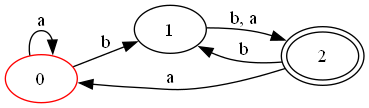

In [25]:
# A faire par l'étudiant
auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})
print(auto1)
auto1.show()

3. Créer l'automate $\mathcal{A}$ à partir d'un fichier. Pour cela,
  créer un fichier `auto2.txt`, dans lequel sont indiqués les
  listes des états et des transitions, ainsi que l'état initial et
  l'état final, en respectant la syntaxe donnée dans la section
  précédente. Par exemple la liste d'étatsest décrite par la ligne
  `#E: 0 1 2`.  Utiliser ensuite par exemple l'appel
  `auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")`, puis afficher
  l'automate `auto2` à l'aide de `print` ainsi qu'à l'aide de `show`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-b->1]
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [1-b->2(fin)]



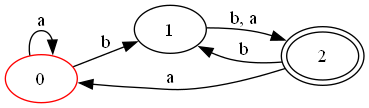

In [26]:
# A faire par l'étudiant
auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
print(auto2)
auto2.show()

#### 2.2 Premières manipulations <a class="anchor" id="sec2_2"></a>

1. Appeler la fonction `removeTransition` sur l'automate
  `auto` en lui donnant en argument la transition $(0,a,1)$. Il
  s'agit donc de créer une variable `t` de type
  `Transition` représentant $(0,a,1)$ et d'effectuer l'appel
  `auto.removeTransition(t)`. Observer le résultat sur un
  affichage.  Appeler ensuite cette fonction sur `auto` en lui
  donnant en argument la transition `t1`. Observer le résultat
  sur un affichage. Appeler la fonction `addTransition` sur
  l'automate `auto` en lui donnant en argument la transition
  `t1`. Vérifier que l'automate obtenu est bien le même
  qu'initialement.

--- État initial ---


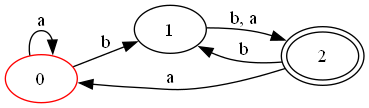


--- Après suppression de (0,a,1) ---


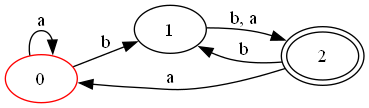

In [27]:
# A faire par l'étudiant
print("--- État initial ---")
auto.show()

# 1. Essai de suppression d'une transition qui N'EXISTE PAS : (0, a, 1)
# On crée cette transition fictive juste pour tester
t = Transition(s0, "a", s1)
auto.removeTransition(t) 
print("\n--- Après suppression de (0,a,1) ---")
auto.show()




--- Après suppression de t1 (La boucle sur 0 doit disparaître) ---


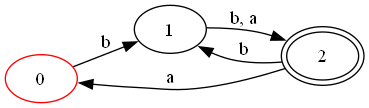


--- Après remise de t1 ---


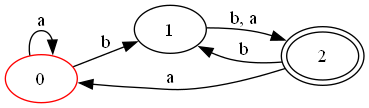

In [28]:
# A faire par l'étudiant
# 2. Suppression d'une transition qui EXISTE : t1 (0, a, 0)
auto.removeTransition(t1)
print("\n--- Après suppression de t1 (La boucle sur 0 doit disparaître) ---")
auto.show()

# 3. On remet la transition t1 pour réparer l'automate
auto.addTransition(t1)
print("\n--- Après remise de t1 ---")
auto.show()

2. Appeler la fonction `removeState` sur l'automate
  `auto` en lui donnant en argument l'état
  `s1`. Observer le résultat. Appeler la fonction
  `addState` sur l'automate `auto` en lui donnant en
  argument l'état `s1`. Créer un état `s0bis` d'identifiant
  $0$ et initial. Appeler la fonction `addState` sur
  `auto` avec `s0bis` comme argument. Observer le résultat.

---Avant la supression de s1---


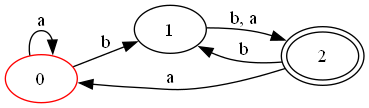

--- Après suppression de s1 ---


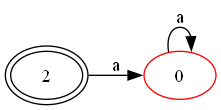

--- Après rajout de s1 ---


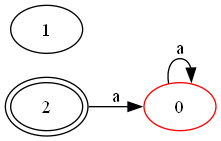

--- Tentative d'ajout de s0bis (Succès : False) ---


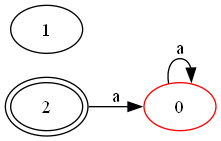

In [29]:
# A faire par l'étudiant
print("---Avant la supression de s1---")
auto.show()
# 1. Supprimer s1
print("--- Après suppression de s1 ---")
auto.removeState(s1)
# L'état 1 disparaît, et les flèches connectées à lui aussi.
auto.show()

# 2. Rajouter s1
auto.addState(s1)
print("--- Après rajout de s1 ---")
# L'état 1 revient, mais il est tout seul (les flèches sont perdues).
auto.show()

# 3. Créer s0bis (id=0, initial=True) et essayer de l'ajouter
s0bis = State(0, True, False, "0bis")
resultat = auto.addState(s0bis)

print(f"--- Tentative d'ajout de s0bis (Succès : {resultat}) ---")
# L'automate ne change pas car l'ID 0 existe déjà.
auto.show()

3. Appeler la fonction `getSetTransitionsFrom` sur
  l'automate `auto1` avec `s1` comme argument. Afficher
  le résultat.

In [30]:
# A faire par l'étudiant
k = auto1.getSetTransitionsFrom(s1)
print(k)

{[1-b->2(fin)], [1-a->2(fin)]}


### 3. Exercices de base : tests et complétion  <a class="anchor" id="sec3"></a>

1. Donner une définition de la fonction `succ`
  qui, étant donné un ensemble d'états $S$ et une chaîne de caractères
      $a$ (de longueur 1), renvoie l'ensemble des états successeurs de tous les états de $L$ par le caractère $a$. Cette fonction doit généraliser la fonction `succElem` pour qu'elle prenne en paramètre un ensemble d'états au lieu d'un seul état.  Formellement, si $S$ est un ensemble d'états et $a$ une lettre,
  $$succ(S,a) = \bigcup_{s \in S}succ(s,a) = \{s' \in S \mid \text{il existe } s \in L \text{ tel que } s \xrightarrow{a} s'\}.$$

In [31]:
# A faire par l'étudiant

def succ(self, setStates, lettre):
    """ Automate x set[State] x str -> set[State]
        rend l'ensemble des états accessibles à partir de l'ensemble d'états setStates par l'étiquette lettre
    """
    successeurs_totaux = set()
    
    # On parcourt chaque état de l'ensemble donné en entrée
    for state in setStates:
        # On ajoute les successeurs de cet état précis (en utilisant succElem)
        # .update() permet d'ajouter plusieurs éléments d'un coup sans doublons
        successeurs_totaux.update(self.succElem(state, lettre))
        
    return successeurs_totaux

Automate.succ = succ

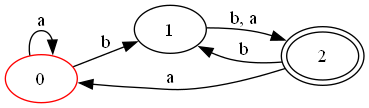

---


In [32]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.succ({s0, s2}, 'b') == {s1}
assert auto1.succ({s0}, 'a') == {s0}
assert auto1.succ({s0, s1}, 'a') == {s0, s2}

In [33]:
# Fournir un autre jeu de tests
assert auto1.succ({s0}, 'b') == {s1}
assert auto1.succ({s1,s2}, 'a') == {s0,s2}
assert auto1.succ({s0, s1 , s2}, 'a') == {s0,s2}
assert auto1.succ({s0, s1 , s2}, 'b') == {s1,s2}
assert auto1.succ({s2}, 'b') == {s1}

2. Donner une définition de la fonction `accepte`
  qui, étant donné une chaîne de caractères `mot`,
  renvoie un booléen qui vaut vrai si et seulement si `mot` est accepté par l'automate. Attention, noter que l'automate peut ne pas être déterministe.

In [34]:
# A faire par l'étudiant

def accepte(self, mot) :
    """ Automate x str -> bool
        rend True si auto accepte mot, False sinon
    """
    # 1. On commence sur l'ensemble des états initiaux
    etats_courants = self.getSetInitialStates()
    
    # 2. On lit le mot lettre par lettre
    for lettre in mot:
        # On calcule les états suivants en utilisant la fonction succ définie juste avant
        etats_courants = self.succ(etats_courants, lettre)
    
    # 3. À la fin du mot, on regarde si AU MOINS UN des états où on se trouve est final
    for s in etats_courants:
        if s.fin:
            return True
            
    return False

# On attache la fonction à la classe
Automate.accepte = accepte

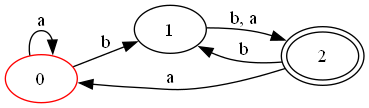

---


In [35]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.accepte('aa') == False
assert auto1.accepte('ab') == False
assert auto1.accepte('aba') == True


In [36]:
# Fournir un autre jeu de tests
assert auto1.accepte('ababa') == True
assert auto1.accepte('ba') == True
assert auto1.accepte('baaba') == True
assert auto1.accepte('aaba') == True
assert auto1.accepte('abb') == True
assert auto1.accepte('aaaaaab') == False


3. Donner une définition de la fonction `estComplet`
    qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`
    renvoie un booléen qui vaut vrai si et
    seulement si `auto` est complet par rapport à l'alphabet.
    
    On n'effectuera pas la vérification sur les états non accessibles.

In [37]:
# A faire par l'étudiant

### On ne prend pas en compte les états non accessibles


def estComplet(self, Alphabet):
    """ Automate x set[str] -> bool
        rend True si auto est complet pour les lettres de Alphabet, False sinon
        hyp : les éléments de Alphabet sont de longueur 1
    """
    # Étape 1 : Trouver les états accessibles (Parcours en largeur)
    accessibles = set(self.getSetInitialStates())
    file_attente = list(accessibles) # Une liste pour gérer les états à visiter
    
    i = 0
    while i < len(file_attente):
        etat_courant = file_attente[i]
        i += 1
        # On regarde toutes les transitions qui partent de cet état
        for t in self.getSetTransitionsFrom(etat_courant):
            # Si la destination n'est pas encore connue, on l'ajoute
            if t.stateDest not in accessibles:
                accessibles.add(t.stateDest)
                file_attente.append(t.stateDest)
    
    # Étape 2 : Vérifier la complétude UNIQUEMENT sur ces états accessibles
    for state in accessibles:
        for lettre in Alphabet:
            # On utilise succElem pour voir s'il y a au moins un successeur
            successeurs = self.succElem(state, lettre)
            
            # S'il n'y a aucun successeur pour cette lettre, l'automate n'est pas complet
            if len(successeurs) == 0:
                return False
                
    return True

# On attache la fonction à la classe Automate
Automate.estComplet = estComplet

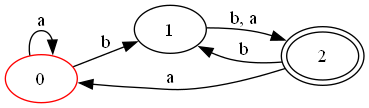

---


In [38]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
assert auto1.estComplet({'a', 'c', 'b'}) == False


--- Après suppression de t1 (pas complet manque lettre a qui sort de 0) ---


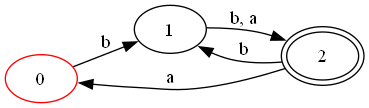

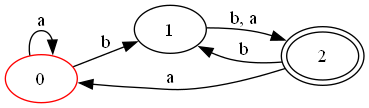

In [39]:
# Fournir un autre jeu de tests
# Suppression d'une transition qui EXISTE : t1 (0, a, 0)
auto1.removeTransition(t1)
print("\n--- Après suppression de t1 (pas complet manque lettre a qui sort de 0) ---")
auto1.show()
assert auto1.estComplet({'a'}) == False
assert auto1.estComplet({'b'}) == True
assert auto1.estComplet({'a','b'}) == False
auto1.addTransition(t1)
auto1.show()


4. Donner une définition de la fonction `estDeterministe`
qui, étant donné un automate `auto`,
 renvoie un booléen qui vaut vrai si et seulement si `auto` est déterministe.

In [40]:
# A faire par l'étudiant
def estDeterministe(self) :
    """ Automate -> bool
        rend True si auto est déterministe, False sinon
    """
    # Condition 1: Un seul état initial
    if len(self.getSetInitialStates()) > 1:
        return False
        
    # Condition 2: Pour chaque état et chaque lettre, au plus une transition
    for s in self.allStates:
        # On vérifie les étiquettes sortantes de cet état
        transitions = self.getSetTransitionsFrom(s)
        lettres_vues = set()
        for t in transitions:
            if t.etiquette in lettres_vues:
                return False # Deux transitions avec la même lettre partant du même état
            lettres_vues.add(t.etiquette)
            
    return True
    
Automate.estDeterministe = estDeterministe

L'appel de fonction `copy.deepcopy(auto)` renvoie un nouvel automate identique à `auto`.

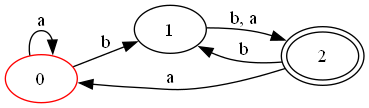

---


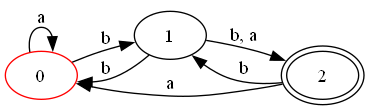

---


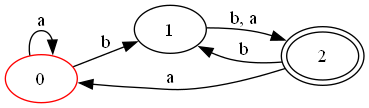

---


In [41]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1bis = copy.deepcopy(auto1)
#t : Transition
t = Transition(s1, 'b', s0)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False

auto1bis.removeTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True

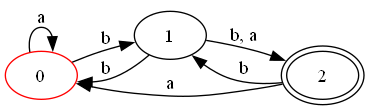

à partir de l'état 1 deux transitions etiqués par b sortant =>donc non deterministe


In [42]:
# Fournir un autre jeu de tests
ab = copy.deepcopy(auto1)
ti = Transition(s1, 'b', s0)
ab.addTransition(ti)
ab.show()
assert ab.estDeterministe() == False
print("à partir de l'état 1 deux transitions etiqués par b sortant =>donc non deterministe")


5. Donner une définition de la fonction `completeAutomate`
qui, étant donné un automate `auto` et l'ensemble alphabet d'entrée `Alphabet`,
renvoie l'automate complété d'`auto`.
  
Attention, il ne faut pas modifier `auto`, mais construire un nouvel automate.
<br>Il pourra être intéressant d'utiliser l'appel de fonction
`copy.deepcopy(auto)` qui renvoie un nouvel automate identique à `auto`.
<br>On pourra faire appel à la fonction `nextId` afin de construire l'état $\bot$.

In [43]:
# A faire par l'étudiant

def completeAutomate(self, Alphabet) :
    """ Automate x str -> Automate
        rend l'automate complété de self, par rapport à Alphabet
    """
    # 1. On effectue une copie profonde pour ne pas modifier l'automate original
    res = copy.deepcopy(self)
    
    # 2. Si l'automate est déjà complet sur cet alphabet, on le retourne tel quel
    # (Cette étape est optionnelle mais optimise le code)
    if res.estComplet(Alphabet):
        return res
    
    # 3. Création de l'état puit (sink state)
    # On utilise nextId() pour avoir un identifiant unique
    id_poubelle = res.nextId()
    # Cet état n'est ni initial, ni final.
    etat_poubelle = State(id_poubelle, False, False, "poubelle")
    res.addState(etat_poubelle)
    
    # 4. On parcourt tous les états (y compris l'état puit que l'on vient d'ajouter)
    # pour ajouter les transitions manquantes.
    # On convertit en liste pour figer l'ensemble des états avant l'itération.
    tous_les_etats = list(res.allStates)
    
    for s in tous_les_etats:
        for lettre in Alphabet:
            # On vérifie s'il existe au moins une transition sortante pour cette lettre
            destinations = res.succElem(s, lettre)
            
            # S'il n'y a aucune transition, on en crée une vers l'état puit
            if len(destinations) == 0:
                t = Transition(s, lettre, etat_poubelle)
                res.addTransition(t)
                
    return res

Automate.completeAutomate = completeAutomate

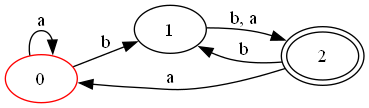

---


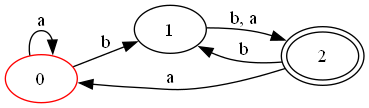

---


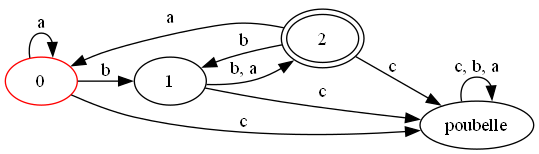

In [44]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
auto1complet = auto1.completeAutomate({'a', 'b'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b'}) == True

print('---')
assert auto1.estComplet({'a', 'b', 'c'}) == False
auto1complet = auto1.completeAutomate({'a', 'b', 'c'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b','c'}) == True

---  Automate  incomplet ---
Automate de départ :


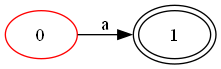

Automate complété :


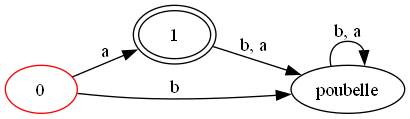

In [45]:
# Fournir un autre jeu de tests
print("---  Automate  incomplet ---")
# Création d'un automate simple : 0 --a--> 1
s0 = State(0, True, False)
s1 = State(1, False, True)
t = Transition(s0, 'a', s1)
auto_ = Automate({t})

print("Automate de départ :")
auto_.show()

# On complète sur l'alphabet {a, b}
# Il manque : la transition 'b' sur l'état 0, et 'a','b' sur l'état 1
auto_complet = auto_.completeAutomate({'a', 'b'})

print("Automate complété :")
auto_complet.show()




### 4. Déterminisation  <a class="anchor" id="sec4"></a>

1. Donner une définition de la fonction `newLabel`
qui, étant donné un ensemble d'états renvoie une chaine de caractères représentant l'ensemble de tous les labels des états.
Par exemple, l'appel de `newLabel` sur un ensemble de 3 états dont les labels sont `'1', '2', '3'` renvoie `'{1,2,3}'`

Afin d'être assuré que l'ordre de parcours de l'ensemble des états n'a pas d'importance, il sera nécessaire de trier par ordre alphabétique la liste des `label` des états. On pourra faire appel à `L.sort()` qui étant donné la liste `L` de cha^nes de caractères, la trie en ordre alphabétique.

In [46]:
# A faire par l'étudiant

def newLabel(S):
    """ set[State] -> str
    """
    # 1. On récupère la liste des labels de tous les états de l'ensemble S
    labels = [s.label for s in S]
    
    # 2. On trie cette liste par ordre alphabétique
    # Cela garantit l'unicité de la représentation (ex: "1,2" et pas "2,1")
    labels.sort()
    
    # 3. On joint les éléments avec une virgule et on entoure d'accolades
    return "{" + ",".join(labels) + "}"

In [47]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

assert newLabel(auto1.allStates) == '{0,1,2}'

In [48]:
# Fournir un autre jeu de tests
assert newLabel(auto_complet.allStates) == '{0,1,poubelle}'


La fonction suivante permet de déterminiser un automate. On remarque qu'un état peut servir de clé dans un dictionnaire.

In [49]:
def determinisation(self) :
    """ Automate -> Automate
    rend l'automate déterminisé d'auto """
    # Ini : set[State]
    Ini = self.getSetInitialStates()
    # fin : bool
    fin = False
    # e : State
    for e in Ini:
        if e.fin:
            fin = True
    lab = newLabel(Ini)
    s = State(0, True, fin, lab)
    A = Automate(set())
    A.addState(s)
    Alphabet = {t.etiquette for t in self.allTransitions}
    Etats = dict()
    Etats[s] = Ini
    A.determinisation_etats(self, Alphabet, [s], 0, Etats, {lab})
    return A

Automate.determinisation = determinisation

L'automate déterminisé est construit dans `A`. Pour cela la fonction récursive `determinisation_etats` modifie en place l'automate `A`, et prend en outre les paramètres suivants :
- `auto`, qui est l'automate de départ à déterminiser
- `Alphabet` qui contient l'ensemble des lettres étiquetant les transistions de l'automate de départ
- `ListeEtatsATraiter` qui est la liste des états à ajouter et à traiter dans `A` au fur et à mesure que l'on progresse dans `auto`.
- `i` qui est l'indice de l'état en cours de traitement (dans la liste `ListeEtatsATraiter`).
- `Etats` qui est un dictionnaire dont les clés sont les états de `A` et les valeurs associées sont l'ensemble d'états issus de `auto` que cette clé représente.
- `DejaVus` est l'ensemble des labels d'états de `A` déjà vus.

In [50]:
# A faire par l'étudiant (on conserve la spécification de la fonction) 

def determinisation_etats(self, auto, Alphabet, ListeEtatsATraiter, i, Etats, DejaVus):
    """ Automate x Automate x set[str] x list[State] x int x dict[State : set[State]], set[str] -> NoneType
    """
    # 1. Condition d'arrêt : si l'indice i a dépassé la taille de la liste, on a tout traité.
    if i >= len(ListeEtatsATraiter):
        return

    # 2. Récupération de l'état du nouvel automate (DFA) en cours de traitement
    etat_courant = ListeEtatsATraiter[i]
    # Récupération de l'ensemble des états de l'automate d'origine (NFA) correspondant
    etats_origine = Etats[etat_courant]

    # 3. Exploration des transitions pour chaque lettre de l'alphabet
    for lettre in Alphabet:
        # On cherche l'ensemble des successeurs dans l'automate d'origine
        # (On utilise la fonction auto.succ définie précédemment)
        ensemble_succ = auto.succ(etats_origine, lettre)

        # Si l'ensemble des successeurs n'est pas vide
        if len(ensemble_succ) > 0:
            # On calcule le label de ce nouvel ensemble d'états
            label_succ = newLabel(ensemble_succ)

            # CAS A : Cet état cible existe déjà dans le nouvel automate
            if label_succ in DejaVus:
                # On doit retrouver l'objet State correspondant dans self.allStates
                etat_destination = None
                for s in self.allStates:
                    if s.label == label_succ:
                        etat_destination = s
                        break
                
                # On ajoute simplement la transition vers cet état existant
                if etat_destination is not None:
                    self.addTransition(Transition(etat_courant, lettre, etat_destination))

            # CAS B : C'est un nouvel état (jamais vu)
            else:
                # On détermine si ce nouvel état doit être final
                # (Il est final si au moins un des états d'origine le composant est final)
                est_final = False
                for s in ensemble_succ:
                    if s.fin:
                        est_final = True
                        break
                
                # Création du nouvel état
                # Note: il n'est pas initial (seul le tout premier l'est, géré par determinisation())
                nouveau_id = self.nextId()
                nouveau_state = State(nouveau_id, False, est_final, label_succ)

                self.addState(nouveau_state)           # Ajout dans l'automate
                DejaVus.add(label_succ)                # Marquage comme vu
                Etats[nouveau_state] = ensemble_succ   # Mémorisation de la correspondance
                ListeEtatsATraiter.append(nouveau_state) # Ajout à la liste des tâches

                # Création de la transition vers ce nouvel état
                self.addTransition(Transition(etat_courant, lettre, nouveau_state))

    # 4. Appel récursif pour traiter l'état suivant dans la liste
    self.determinisation_etats(auto, Alphabet, ListeEtatsATraiter, i + 1, Etats, DejaVus)

Automate.determinisation_etats = determinisation_etats

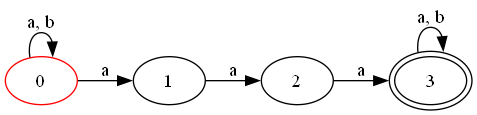

True


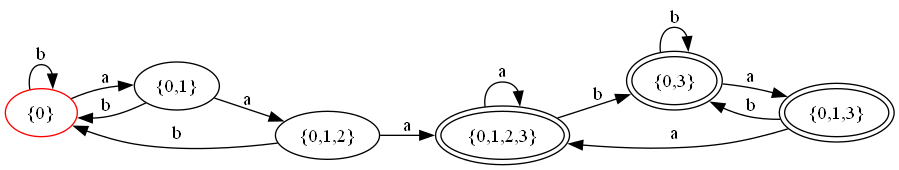

In [51]:
# Voici un test
#automate est l'automate construit plus haut a partir du fichier exempleAutomate.txt
automate.show()
auto_det = automate.determinisation()
print(auto_det.estDeterministe())
auto_det.show(2)

Automate Non Déterministe :


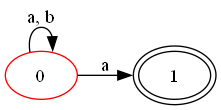


--- Déterminisation ---


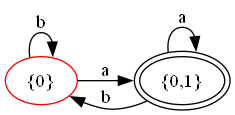

In [52]:
# Fournir un autre jeu de tests
s0 = State(0, True, False)
# s1 est non initial, Final
s1 = State(1, False, True)

# Création des transitions
# 1. On boucle sur s0 avec 'a' et 'b'
t1 = Transition(s0, "a", s0)
t2 = Transition(s0, "b", s0)
t3 = Transition(s0, "a", s1)
auto_nd = Automate({t1, t2, t3})
print("Automate Non Déterministe :")
auto_nd.show()
is_det = auto_nd.estDeterministe()

succs_a = auto_nd.succElem(s0, "a")
assert len(succs_a) == 2 
print("\n--- Déterminisation ---")

auto_det = auto_nd.determinisation()
auto_det.show()
assert auto_det.estDeterministe() == True



### 5. Constructions sur les automates réalisant  des opérations sur les langages acceptés <a class="anchor" id="sec5"></a>


#### 5.1 Opérations ensemblistes sur les langages <a class="anchor" id="sec5_1"></a>

1. Donner une définition de la fonction `complementaire` qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`, renvoie l'automate acceptant la langage complémentaire du langage accepté par `auto`. Ne pas modifier l'automate `auto`, mais construire un nouvel automate.

In [53]:
def complementaire(self, Alphabet):
    """ Automate x set[str] -> Automate
        rend  l'automate acceptant le complémentaire du langage de self
    """
    # 1. On rend l'automate déterministe
    # (Même s'il l'est déjà, cela crée une copie propre sur laquelle travailler)
    auto_det = self.determinisation()
    
    # 2. On rend l'automate complet
    auto_complet = auto_det.completeAutomate(Alphabet)
    # 3. On inverse les états finaux et non finaux
    for s in auto_complet.allStates:
        # Si c'était True, ça devient False. Si c'était False, ça devient True.
        s.fin = not s.fin
        
    return auto_complet

Automate.complementaire = complementaire   

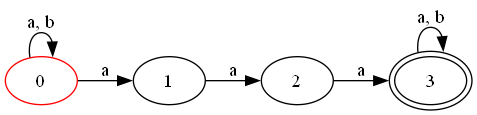

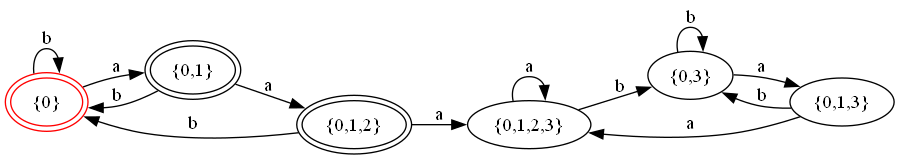

In [54]:
# Voici un test

automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
Alphabet = {t.etiquette for t in auto.allTransitions}
auto_compl = automate.complementaire(Alphabet)
auto_compl.show(2)

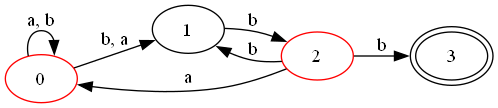

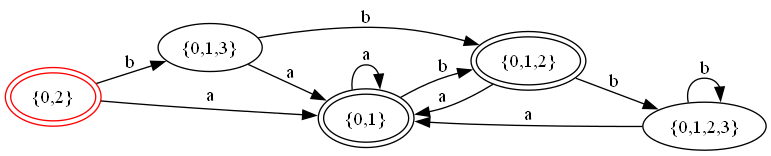

-------------------


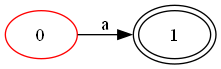

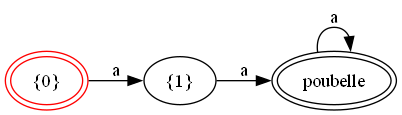

In [55]:
# Fournir un autre jeu de tests
automate1 = Automate.creationAutomate("ExemplesAutomates/autotst.txt")
automate1.show()
Alphabet = {t.etiquette for t in automate1.allTransitions}
auto_complf = automate1.complementaire(Alphabet)
auto_complf.show(2)
print("-------------------")
automate1 = Automate.creationAutomate("ExemplesAutomates/aut_b.txt")
automate1.show()
Alphabet = {t.etiquette for t in automate1.allTransitions}
auto_complf = automate1.complementaire(Alphabet)
auto_complf.show(2)

2. Donner une définition de la fonction `intersection` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant l'intersection des langages acceptés par `auto1` et `auto2`.

L'automate construit ne doit pas avoir d'état non accessible depuis l'état initial.

In [56]:
# Visualisation du fonctionnement de itertools.product
L1 = [1, 2, 3]
L2 = ["a", "b", "c"]
L = set(itertools.product(L1, L2))
print(L)

{(1, 'a'), (2, 'c'), (2, 'b'), (3, 'c'), (3, 'b'), (1, 'c'), (1, 'b'), (2, 'a'), (3, 'a')}


In [57]:
#A faire par l'étudiant

def intersection(self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'intersection des langages des deux automates
    """
    res = Automate(set())
    
    # Produit cartésien des états initiaux
    init_pairs = list(itertools.product(self.getSetInitialStates(), auto.getSetInitialStates()))
    pairs_dict = {}
    process = []

    # 1. Création des états initiaux
    for (s1, s2) in init_pairs:
        # Pour l'intersection : ET logique
        est_final = s1.fin and s2.fin
        label = f"({s1.label},{s2.label})"
        
        # Si c'est le tout premier état, on lui donne l'ID 0
        if len(res.allStates) == 0:
            nouvel_id = 0
        else:
            nouvel_id = res.nextId()
        # -------------------------
        
        new_s = State(nouvel_id, True, est_final, label)
        res.addState(new_s)
        pairs_dict[(s1, s2)] = new_s
        process.append((s1, s2))

    while process:
        (s1, s2) = process.pop() # .pop() recupere le dernier element de la liste puis elle supprime cet element
        current_res_state = pairs_dict[(s1, s2)]
        
        for t1 in self.getSetTransitionsFrom(s1):
            for t2 in auto.getSetTransitionsFrom(s2):
                # On ne garde que les transitions synchronisées (même lettre)
                if t1.etiquette == t2.etiquette:
                    target_pair = (t1.stateDest, t2.stateDest)
                    
                    if target_pair not in pairs_dict:
                        s1_next, s2_next = target_pair
                        
                        # Pour l'intersection : ET logique
                        est_fin = s1_next.fin and s2_next.fin
                        lbl = f"({s1_next.label},{s2_next.label})"
                        
                        # Ici l'automate n'est plus vide, nextId() fonctionnera
                        new_next_s = State(res.nextId(), False, est_fin, lbl)
                        res.addState(new_next_s)
                        pairs_dict[target_pair] = new_next_s
                        process.append(target_pair)
                    
                    t_new = Transition(current_res_state, t1.etiquette, pairs_dict[target_pair])
                    res.addTransition(t_new)
                    
    return res

Automate.intersection = intersection

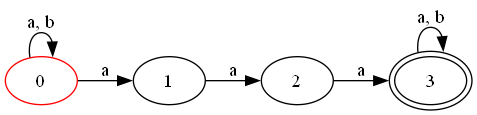

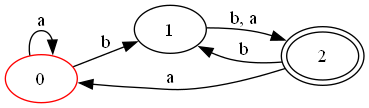

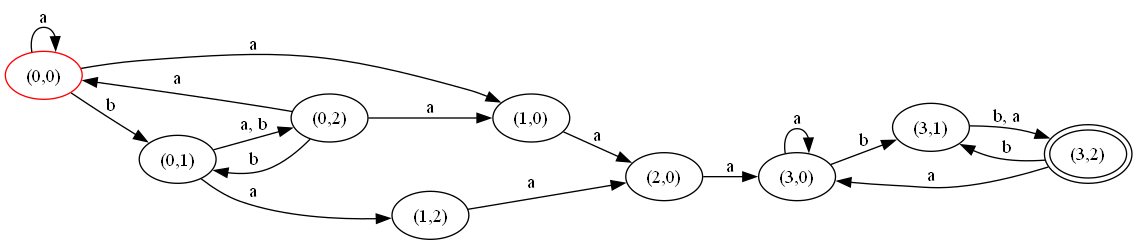

In [58]:
#Un premier test

#auto1 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
#auto2 = Automate.creationAutomate("ExemplesAutomates/exempleInter.txt")
# il faut avoir une variable auto2 contenant un automate
auto2.show()
inter = automate.intersection(auto2)
inter.show(2)

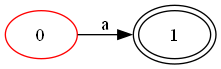

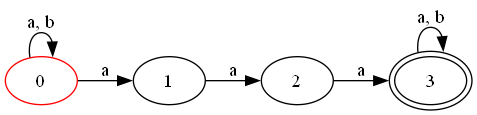

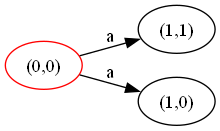

In [59]:
# Fournir d'autres tests
automate1.show()
automate.show()
intersec = automate1.intersection(automate)
intersec.show(2)

3. (Question facultative) Donner une définition de la fonction `union` qui, étant donné deux automates `auto1` `auto2`, renvoie l'automate acceptant comme langage l'union des langages acceptés par `auto1` et `auto2`.

In [60]:
#À faire par l'étudiant

def union(self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'union des langages
    """
    # Note: L'union par produit nécessite idéalement des automates complets
    # Sinon, si A a une transition 'a' et B non, la boucle synchrone ne la créera pas.
    # Dans le cadre de ce TP, on applique souvent le produit simple sur les états.
    
    res = Automate(set())
    
    init_pairs = list(itertools.product(self.getSetInitialStates(), auto.getSetInitialStates()))
    pairs_dict = {}
    process = []

    for (s1, s2) in init_pairs:
        # --- CHANGEMENT POUR UNION : OR ---
        est_final = s1.fin or s2.fin
        label = f"({s1.label},{s2.label})"
        
        if len(res.allStates) == 0:
            nouvel_id = 0
        else:
            nouvel_id = res.nextId()
        # -------------------------

        new_s = State(nouvel_id, True, est_final, label)
        res.addState(new_s)
        pairs_dict[(s1, s2)] = new_s
        process.append((s1, s2))

    while process:
        (s1, s2) = process.pop()
        current_res_state = pairs_dict[(s1, s2)]
        
        for t1 in self.getSetTransitionsFrom(s1):
            for t2 in auto.getSetTransitionsFrom(s2):
                if t1.etiquette == t2.etiquette:
                    target_pair = (t1.stateDest, t2.stateDest)
                    
                    if target_pair not in pairs_dict:
                        s1_next, s2_next = target_pair
                        
                        # --- CHANGEMENT POUR UNION : OR ---
                        est_fin = s1_next.fin or s2_next.fin
                        
                        lbl = f"({s1_next.label},{s2_next.label})"
                        new_next_s = State(res.nextId(), False, est_fin, lbl)
                        
                        res.addState(new_next_s)
                        pairs_dict[target_pair] = new_next_s
                        process.append(target_pair)
                    
                    t_new = Transition(current_res_state, t1.etiquette, pairs_dict[target_pair])
                    res.addTransition(t_new)
                    
    return res

Automate.union = union

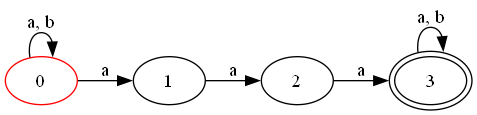

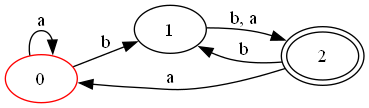

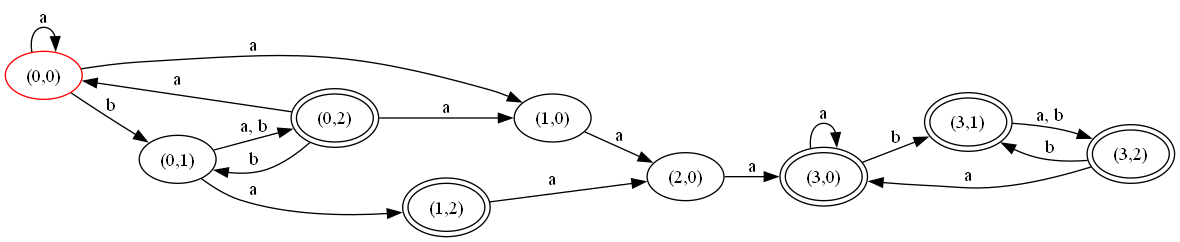

In [61]:
#Un premier test

automate.show()
auto2.show()
uni = automate.union(auto2)
uni.show(2)

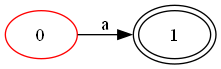

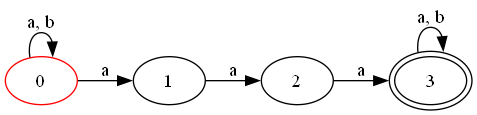

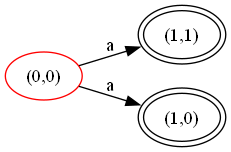

In [62]:
#Fournir d'autres tests
automate1.show()
automate.show()
intersec = automate1.union(automate)
intersec.show(2)

#### 5.2 Opérations rationnelles sur les langages <a class="anchor" id="sec5_2"></a>

Programmer *une des deux* méthodes suivantes:

1. Donner une définition de la fonction `concatenation` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant comme langage la concaténation des langages acceptés par `auto1` et `auto2`.

2. Donner une définition de la fonction `etoile` qui, étant donné un automate `auto`, renvoie l'automate acceptant comme langage l'étoile du langages accepté par `auto`.

In [63]:
# A faire par l'etudiant

def concatenation(self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant L1.L2 (sans ε-transitions)
    """
    res = Automate(set())
    offset = self.nextId() 
    map_A1 = {}
    map_A2 = {}

    # --- ÉTAPE 0 : Vérifier si A1 accepte le mot vide ---
    # Si un état de A1 est à la fois Initial et Final, alors A1 accepte epsilon.
    a1_accepte_vide = False
    for s in self.getSetInitialStates():
        if s.fin:
            a1_accepte_vide = True
            break

    # --- ÉTAPE 1 : Copie des états ---
    a2_accepte_vide = False
    for s in auto.getSetInitialStates():
        if s.fin:
            a2_accepte_vide = True
            break

    for s in self.allStates:
        # Si A2 accepte le vide, finir A1 suffit pour finir le tout. Donc A1 garde son statut final.
        est_final = s.fin if a2_accepte_vide else False
        ns = State(s.id, s.init, est_final, s.label)
        res.addState(ns)
        map_A1[s] = ns

    # États de A2 :
    # Ils gardent leur statut final.
    # IMPORTANT : Ils deviennent initiaux SI A1 accepte le vide !
    for s in auto.allStates:
        est_initial = s.init if a1_accepte_vide else False
        ns = State(s.id + offset, est_initial, s.fin, s.label)
        res.addState(ns)
        map_A2[s] = ns

    # --- ÉTAPE 2 : Transitions internes (Classique) ---
    for t in self.allTransitions:
        res.addTransition(Transition(map_A1[t.stateSrc], t.etiquette, map_A1[t.stateDest]))
    
    for t in auto.allTransitions:
        res.addTransition(Transition(map_A2[t.stateSrc], t.etiquette, map_A2[t.stateDest]))

    # --- ÉTAPE 3 : LE PONT (Court-circuit) ---
    # Pour toute transition de A1 qui mène vers un état FINAL de A1...
    
    I2 = auto.getSetInitialStates() # Les etats initiaux de l'automate 2 

    for t in self.allTransitions:
        if t.stateDest.fin: # Si la destination originale est finale
            for i2 in I2:
                # On ajoute : Source(A1) --etiquette--> Initial(A2)
                res.addTransition(Transition(map_A1[t.stateSrc], t.etiquette, map_A2[i2]))

    return res

Automate.concatenation = concatenation

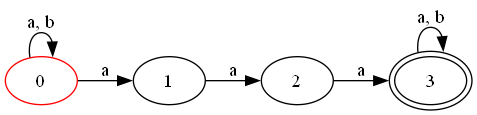

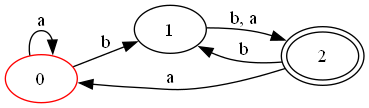

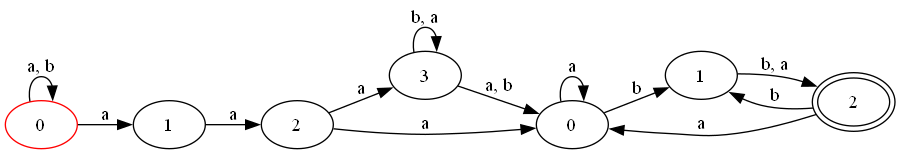

In [64]:
#Un premier test

automate.show()
auto2.show()
concat = automate.concatenation(auto2)
concat.show(2)

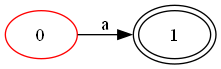

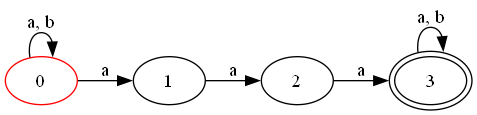

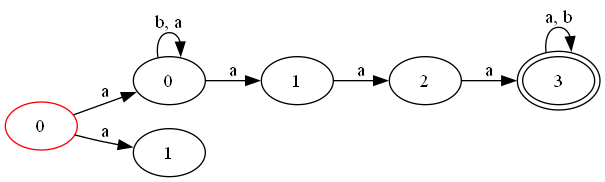

In [65]:
#Fournir d'autres tests
automate1.show()
automate.show()
intersec = automate1.concatenation(automate)
intersec.show(2)

In [66]:
def etoile(self):
    """ Automate -> Automate
    rend l'automate acceptant pour langage l'étoile du langage de l'automate appelant
    """
    res = copy.deepcopy(self)

    old_initials = res.getSetInitialStates()
    old_finals = res.getSetFinalStates()

    # 1. Bouclage fin → début
    transitions_pont = []

    for t in res.allTransitions:
        if t.stateDest in old_finals:
            for i in old_initials:
                transitions_pont.append(Transition(t.stateSrc, t.etiquette, i))
    for t in transitions_pont:
        res.addTransition(t)
    
    new_id = len(res.allStates) 
    state_epsilon = State(new_id, True, True, 'vide') 
    res.addState(state_epsilon)

    return res

Automate.etoile = etoile


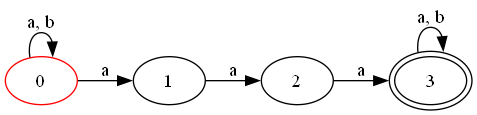

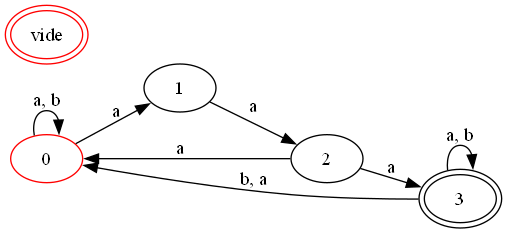

In [67]:
#Un premier test

automate.show()
autoetoile = automate.etoile()
autoetoile.show()

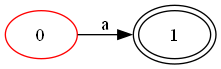

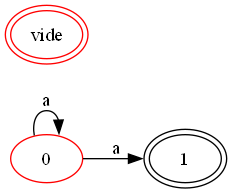

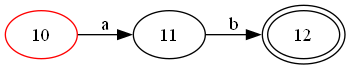

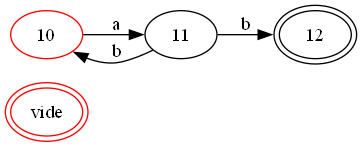

In [68]:
#Fournir d'autres tests
# Jeu de test pour la fonction etoile

# On crée un automate simple qui accepte juste "a" : 0 --a--> 1(fin)
s0 = State(0, True, False)
s1 = State(1, False, True)
t1 = Transition(s0, "a", s1)
auto_a = Automate({t1})
auto_a.show()

auto_etoile = auto_a.etoile()

auto_etoile.show()

s2 = State(2, True, False)
s3 = State(3, False, True)
t2 = Transition(s2, "a", s3)
t3 = Transition(s3, "b", s2) 
s_init = State(10, True, False)
s_inter = State(11, False, False)
s_fin = State(12, False, True)
t_a = Transition(s_init, "a", s_inter)
t_b = Transition(s_inter, "b", s_fin)
auto_ab = Automate({t_a, t_b})

auto_ab.show()

auto_ab_etoile = auto_ab.etoile()
auto_ab_etoile.show()
